In [290]:
from scipy.stats import norm, expon, poisson as pois, binom, uniform as uni
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RandomForestC, GradientBoostingClassifier as GradientBoostingC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm, classification_report, precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score, roc_auc_score, accuracy_score, recall_score
import statsmodels.api as sm
from statsmodels.api import Logit
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [291]:
css = '<style>.output {flex-direction: row;}</style>'
HTML(css)
pd.set_option('display.min_rows', 99999)

In [292]:
df_agua = pd.read_csv('DataBase/water_potability.csv')
df_agua


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# ver a correlação antes de alterar qualquer coisa

In [293]:
corr_bruto = pd.DataFrame.from_dict({k: {i: df_agua[k].corr(df_agua[i]) for i in list(df_agua)} for k in list(df_agua)})
corr_bruto

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# verificando se faltam dados

In [294]:
df_agua.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# como tem quase 1000 dados de sulfato faltando é interessante analisar um pouco mais


In [295]:
pd.DataFrame.from_dict({'Sulfato_na': {i: df_agua['Sulfate'].isna().corr(df_agua[i]) for i in list(df_agua)}, 'Sulfato': {i: df_agua['Sulfate'].corr(df_agua[i]) for i in list(df_agua)}})

,Sulfato_na,Sulfato
ph,-0.003380,0.018203
Hardness,0.008482,-0.106923
Solids,-0.010554,-0.171804
Chloramines,0.003452,0.027244
Sulfate,NaN,1.000000
Conductivity,0.014941,-0.016121
Organic_carbon,-0.023424,0.030831
Trihalomethanes,0.011342,-0.030274
Turbidity,-0.002739,-0.011187
Potability,-0.017148,-0.023577


In [296]:
# em qual intervalo de quantidade de sulfato tem mais agua potavel (talvez fosse td em um so)
df_agua.groupby(pd.cut(df_agua["Sulfate"], [100, 200, 300, 400, 500])).sum()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Sulfate,,,,,,,,,,
"(100, 200]",41.217291,1390.849069,2.136597e+05,62.334002,1058.232554,2714.941131,65.089762,433.041204,24.160863,6
"(200, 300]",2738.399672,93140.327891,1.150551e+07,3261.478099,129514.667820,199508.669879,6528.501431,30580.952958,1857.332158,231
"(300, 400]",11422.639189,370294.373365,4.044337e+07,13434.888267,644151.555619,801702.845009,27148.638982,117636.689146,7457.102608,675
"(400, 500]",787.115474,24727.104161,2.891779e+06,1003.752214,58046.106651,57769.857092,2006.923301,8664.492215,561.519393,73


In [297]:
Sulf_NaN = df_agua.loc[df_agua['Sulfate'].isna()]; Sulf_NaN_Pot = Sulf_NaN['Potability'].sum()
print(f' {Sulf_NaN_Pot * 100 / Sulf_NaN.Sulfate.size}% de NaN (Sulfato) sao potáveis')
print(f' {Sulf_NaN.Sulfate.size * 100 / df_agua.Sulfate.size}% das linhas nao tem dados para Sulfato')

 37.516005121638926% de NaN (Sulfato) sao potáveis
 23.84004884004884% das linhas nao tem dados para Sulfato


In [298]:
sulfato0 = df_agua.loc[df_agua['Potability']==0]; sulfato1 = df_agua.loc[df_agua['Potability']==1]
print(f"media de sulfato em aguas nao potaveis {sulfato0['Sulfate'].sum() / sulfato0['Sulfate'].size} e em aguas potaveis {sulfato1['Sulfate'].sum() / sulfato1['Sulfate'].size} considerando tds as amostras")


media de sulfato em aguas nao potaveis 252.84888751942893 e em aguas potaveis 256.3211935682008 considerando tds as amostras


In [299]:
sulfato_semNaN = df_agua[['Sulfate', 'Potability']].dropna()
sulfato0_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==0]; sulfato1_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==1]

print(f"media de sulfato em aguas nao potaveis {sulfato0_semNaN['Sulfate'].sum() / sulfato0_semNaN['Sulfate'].size} e em aguas potaveis {sulfato1_semNaN['Sulfate'].sum() / sulfato1_semNaN['Sulfate'].size} considerando somente as amostras com dados para sulfato")

media de sulfato em aguas nao potaveis 334.5642895786881 e em aguas potaveis 332.56699023366554 considerando somente as amostras com dados para sulfato


# como apenas o sulfato tem quase 1000 dados faltando nao fiz o mesmo para o resto e decidimos substituir os dados que faltavam pela media de sua respectiva coluna

# Olhando Outliers

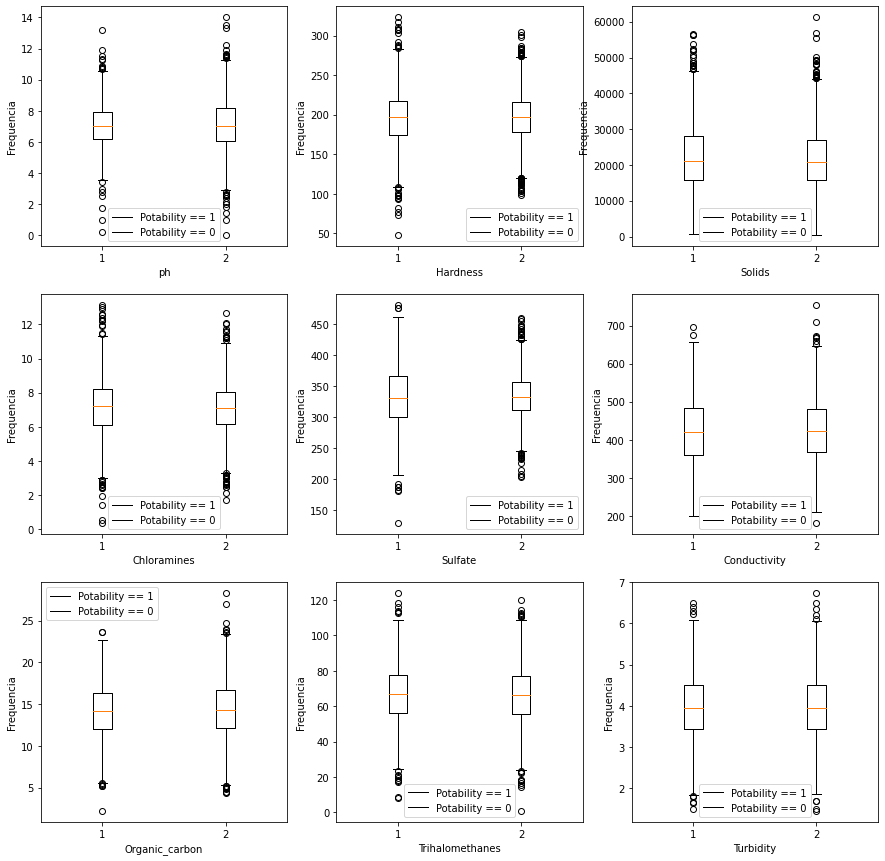

In [300]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua.loc[df_agua['Potability']==1][i].dropna(), df_agua.loc[df_agua['Potability']==0][i].dropna()])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [301]:
Q1 = df_agua.quantile(0.25)
Q3 = df_agua.quantile(0.75)
IQR = Q3 - Q1
Outliers = ((df_agua < (Q1 - 1.5 * IQR)) | (df_agua > (Q3 + 1.5 * IQR))).sum()
Outliers.sum()

366

# com Outliers

In [302]:
df_agua1 = df_agua.copy()
df_agua1_1 = df_agua1.loc[df_agua1['Potability'] == 1]
df_agua1_0 = df_agua1.loc[df_agua1['Potability'] == 0]
for i in list(df_agua):
    df_agua1.loc[df_agua1[i] == 1] = df_agua1.loc[df_agua1[i] == 1].fillna(df_agua1.loc[df_agua1[i] == 1].mean())
    df_agua1.loc[df_agua1[i] == 0] = df_agua1.loc[df_agua1[i] == 0].fillna(df_agua1.loc[df_agua1[i] == 0].mean())
df_agua1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# sem Outliers

In [303]:
df_agua1_Sout = df_agua1.copy()
for i in list(df_agua.columns)[:-1]:
    df_agua1_Sout = df_agua1_Sout[(df_agua1_Sout[i] >= (Q1[i] - 1.5 * IQR[i])) & (df_agua1_Sout[i] <= (Q3[i] + 1.5 * IQR[i]))]
df_agua1_Sout

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [304]:
# verificando se faltam dados
df_agua1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [305]:
corr_ajustada = pd.DataFrame.from_dict({k: {i: df_agua1[k].corr(df_agua1[i]) for i in list(df_agua1)} for k in list(df_agua1)})
corr_ajustada

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


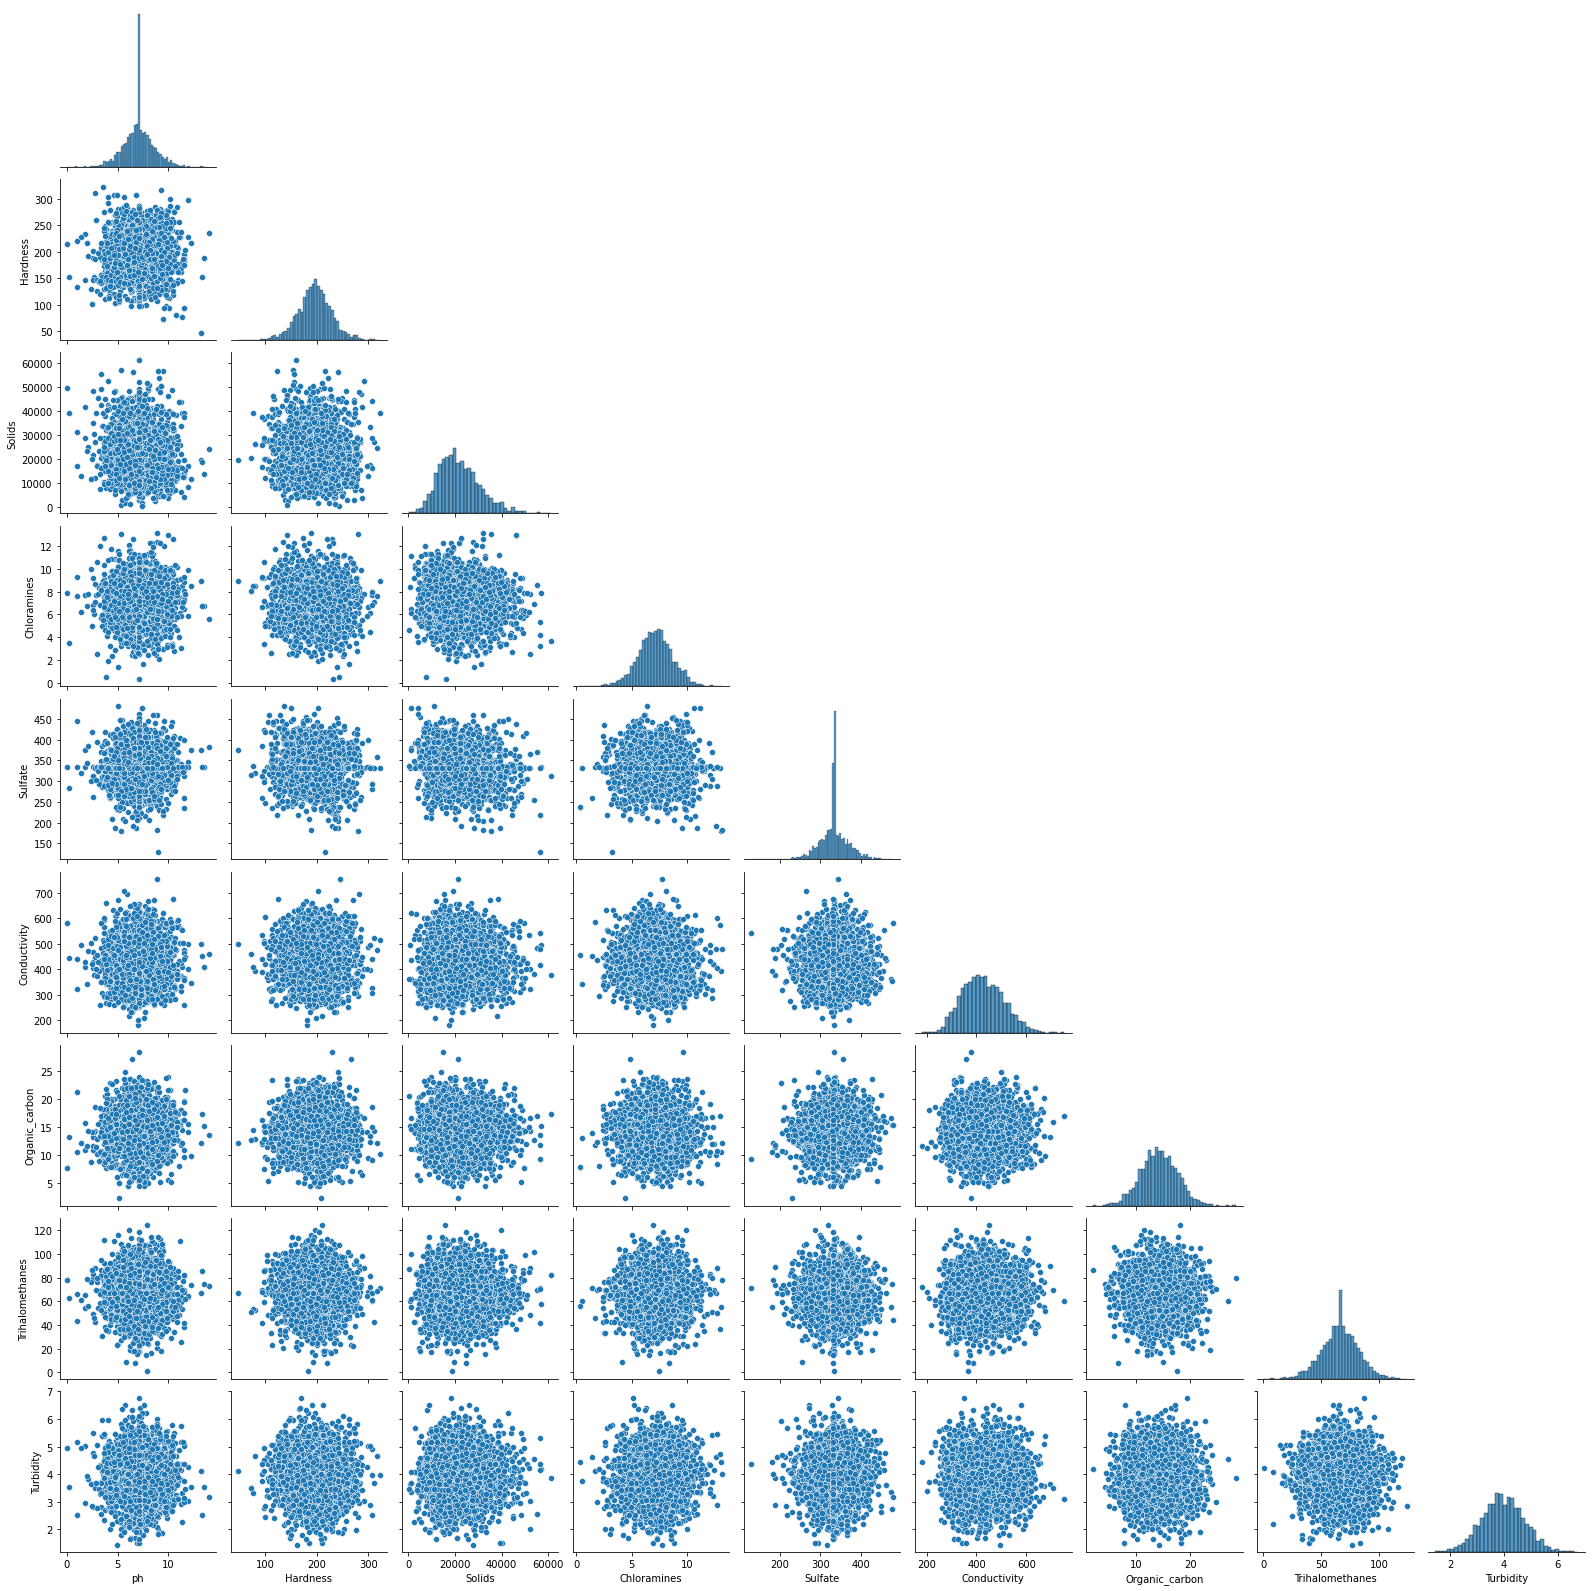

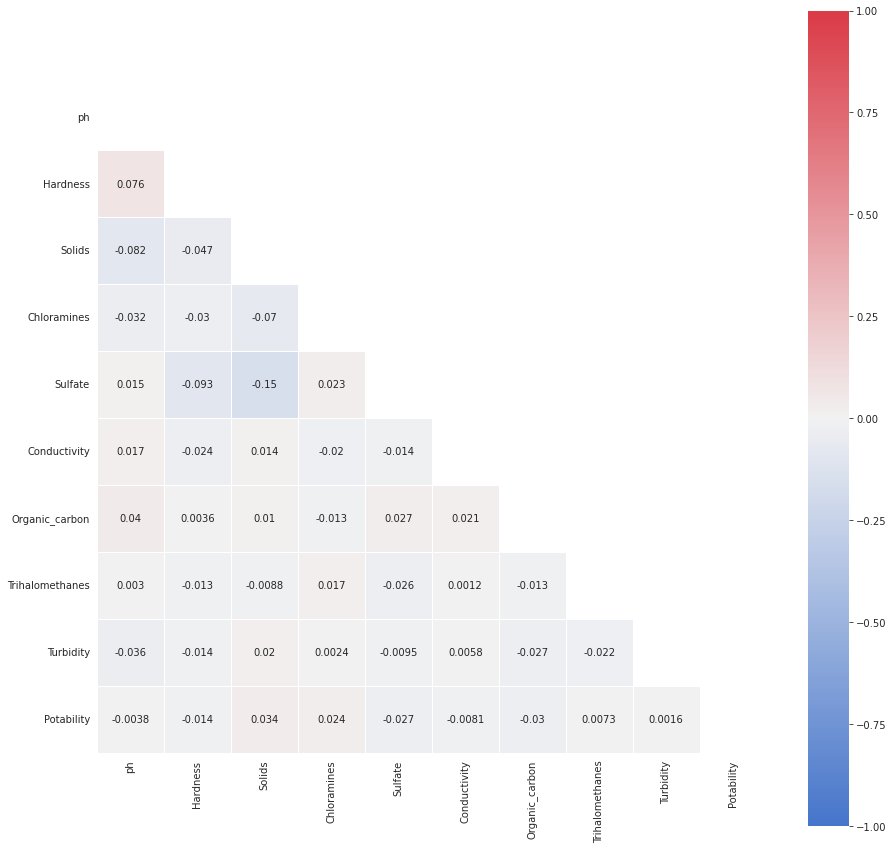

In [306]:
sns.pairplot(df_agua1[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], corner=True)
plt.show(block=False)
mask = np.zeros_like(corr_ajustada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15), num='corr_ajustada sem pot')
    cmap = sns.diverging_palette(255, 10, as_cmap=True)
    sns.heatmap(corr_ajustada, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, square=True, linewidths=1)
plt.show(block=False)

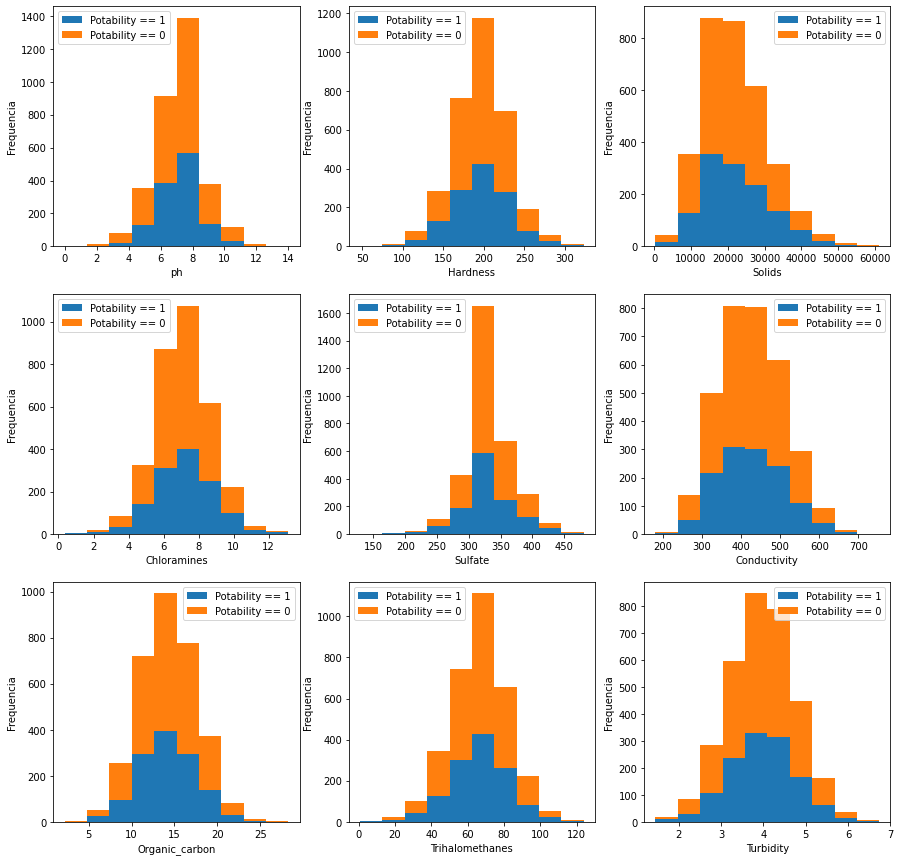

In [307]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.hist([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]], stacked=True)
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

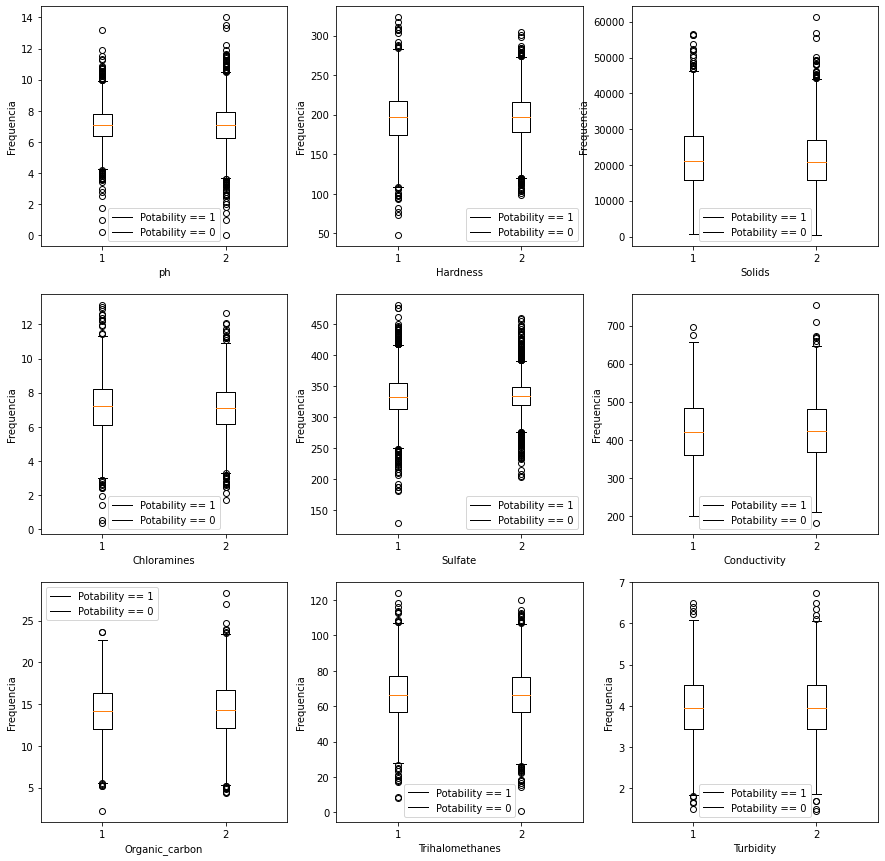

In [308]:
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [309]:
df_agua1.loc[df_agua1['Potability'] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.073783,196.632907,21199.386614,7.215163,332.566990,420.712729,14.162809,66.539684,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [310]:
df_agua1.loc[df_agua1['Potability'] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.085378,197.123423,20809.618280,7.090334,334.564290,422.229331,14.293508,66.303555,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


#  Iniciando modelos de regressão

# Exibir Dados

In [358]:
def metricas(tt_spit, lista_dados):
    arrays = [['Cout','Cout','Cout','Cout','Cout','Cout','Cout','Cout','Sout','Sout','Sout','Sout','Sout','Sout','Sout','Sout'],['Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste','Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste']]
    tuples = list(zip(*arrays))
    dic_ite = [[] for i in range(len(tt_spit[0]))]
    index = ['iteracao' + str(i+1) for i in range(len(tt_spit[0]))]
    columns = pd.MultiIndex.from_tuples(tuples)
    for j in range(len(tt_spit)):
        plt.figure(figsize=(20, 20), num=''.join('Cout' if j == 0 else 'Sout'))
        n=1
        acuracia_treino = [i[0][0] for i in lista_dados[j]]
        acuracia_teste = [i[0][1] for i in lista_dados[j]]
        predicao = [i[0][2] for i in lista_dados[j]]
        precision_treino = [i[1][0] for i in lista_dados[j]]
        precision_teste = [i[1][1] for i in lista_dados[j]]
        for i in range(len(tt_spit[j])):
            Train_X = tt_spit[j][i][0]; Test_X = tt_spit[j][i][1]; Train_Y = tt_spit[j][i][2]; Test_Y = tt_spit[j][i][3]
            Vn, Fp, Fn, Vp = cm(Test_Y, predicao[i]).ravel()
            dic_ite[i].append(Vp)
            dic_ite[i].append(Vn)
            dic_ite[i].append(Fp)
            dic_ite[i].append(Fn)
            dic_ite[i].append(acuracia_treino[i])
            dic_ite[i].append(acuracia_teste[i])
            dic_ite[i].append(precision_treino[i])
            dic_ite[i].append(precision_teste[i])
            plt.subplot(3, 4, n)
            mc = cm(Test_Y, predicao[i])
            cmap = sns.diverging_palette(255, 10, as_cmap=True)
            sns.heatmap(mc, cmap=cmap, annot=True, square=True, linewidths=1)
            plt.title(f'iteracao {n}\nacuracia {acuracia_teste[i]}')
            n+=1
        plt.subplot(3, 4, 12)
        plt.hist([round(i) for i in acuracia_teste])
        plt.xlabel('Acuracia')
        plt.ylabel('Frequencia')
        plt.show()
    df = pd.DataFrame(dic_ite, index=index, columns=columns)
    df[('Cout-Sout','acuracia_treino')] = df[('Cout','acuracia_treino')] - df[('Sout','acuracia_treino')]
    df[('Cout-Sout','acuracia_teste')] = df[('Cout','acuracia_teste')] - df[('Sout','acuracia_teste')]
    df[('Cout-Sout','precision_treino')] = df[('Cout','precision_treino')] - df[('Sout','precision_treino')]
    df[('Cout-Sout','precision_teste')] = df[('Cout','precision_teste')] - df[('Sout','precision_teste')]
    return df

# Random Forest Classifier

In [350]:
def RF_Clf(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_score = RF_clf.score(Train_X, Train_Y)*100
    RF_test_score = RF_clf.score(Test_X, Test_Y)*100
    RF_train_pred = RF_clf.predict(Train_X)
    RF_test_pred = RF_clf.predict(Test_X)
    RF_train_Recalscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_Recalscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Recalscore, RF_test_Recalscore]]

# XGBoost Classifier

In [351]:
def XGB_Clf(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = GradientBoostingC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_score = XGB_clf.score(Train_X, Train_Y)*100
    XGB_test_score = XGB_clf.score(Test_X, Test_Y)*100
    XGB_train_pred = XGB_clf.predict(Train_X)
    XGB_test_pred = XGB_clf.predict(Test_X)
    XGB_train_precision_score = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_precision_score = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_precision_score, XGB_test_precision_score]]

# Logistic Regression

In [352]:
def LogReg(Train_X, Test_X, Train_Y, Test_Y):
    Log_reg = Logit(Train_Y, Train_X).fit(disp=0)
    LR_train_pred = Log_reg.predict(Train_X)
    LR_test_pred = Log_reg.predict(Test_X)
    LR_train_precisionscore = precision_score(Train_Y, round(LR_train_pred))*100
    LR_test_precisionscore = precision_score(Test_Y, round(LR_test_pred))*100
    return [[accuracy_score(Train_Y, round(LR_train_pred))*100, accuracy_score(Test_Y, round(LR_test_pred))*100, round(LR_test_pred)], [LR_train_precisionscore, LR_test_precisionscore]]

# Neural Network

In [315]:
def my_neural_network(Train_X, Test_X, Train_Y, Test_Y, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, epochs=50, batch_size=1, verbose=1):

    normalizer = StandardScaler().fit(Train_X)

    Train_X = normalizer.transform(Train_X)

    Test_X = normalizer.transform(Test_X)

    model = Sequential()

    model.add(Dense(units=16, activation='relu', input_shape=(9,)))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics, loss_weights=loss_weights, weighted_metrics=weighted_metrics, run_eagerly=run_eagerly, steps_per_execution=steps_per_execution)

    model.fit(Train_X, Train_Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    Predict_Y = model.predict(Test_X)
    score = model.evaluate(Test_X, Test_Y,verbose=1, return_dict=True)
    return score

# Rodando os classificadores

In [368]:
listaCout_tts = []; listaSout_tts = []; lista_tts = [[], []]; lista_RF = [[], []]; lista_XGB = [[], []]; lista_LR = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts[0].append(ttCout_split)
    lista_tts[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_LR[0].append(LogReg(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_LR[1].append(LogReg(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

e:\projetos\py-charm\cdados\projetos\p2-cdados-2021-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\projetos\py-charm\cdados\projetos\p2-cdados-2021-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\projetos\py-charm\cdados\projetos\p2-cdados-2021-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\projetos\py-c

# Random Forest

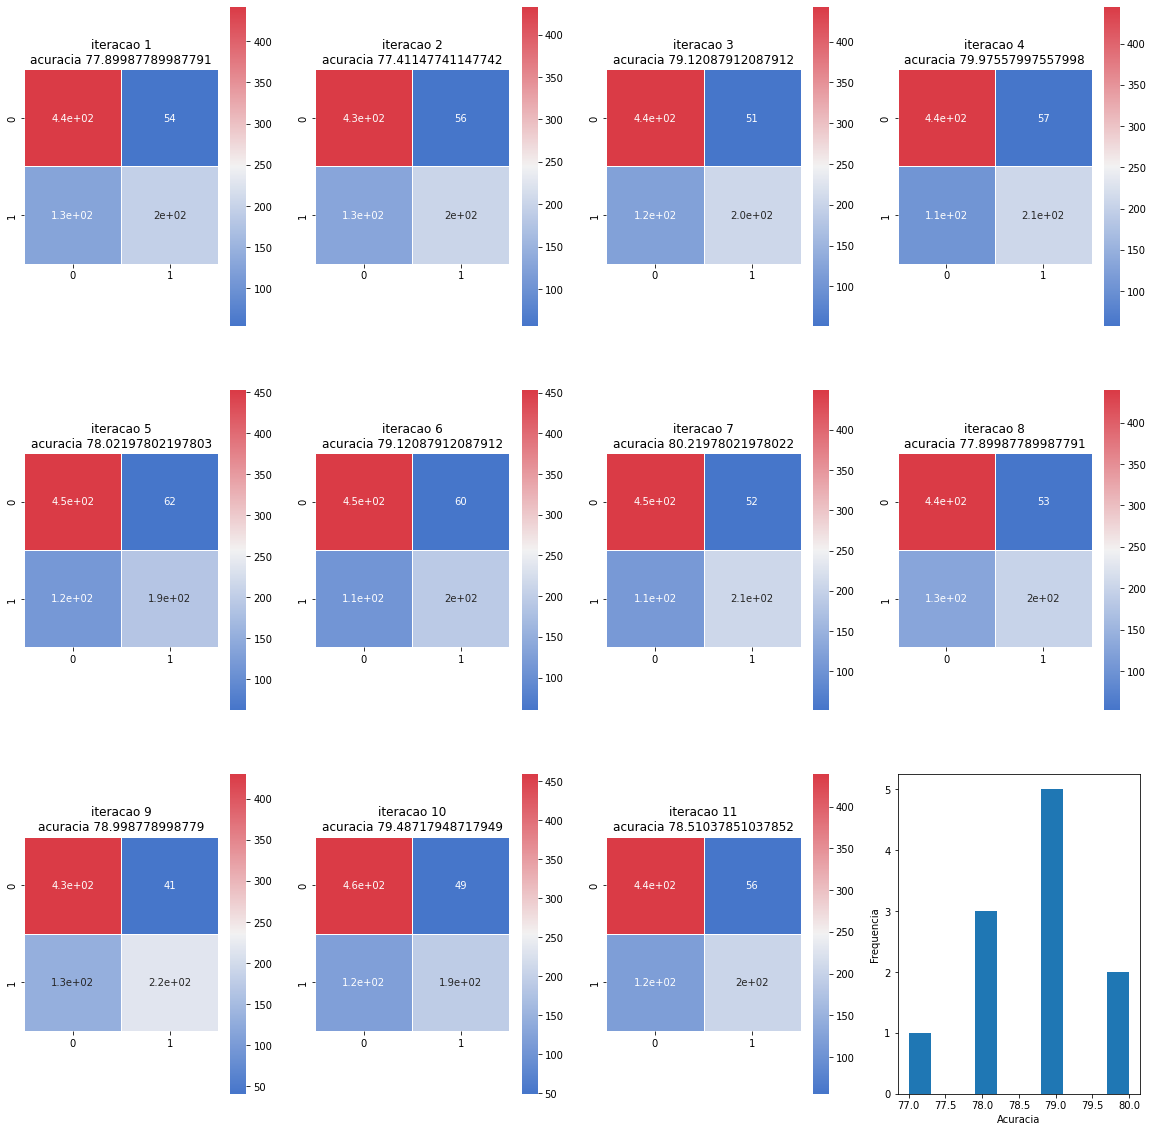

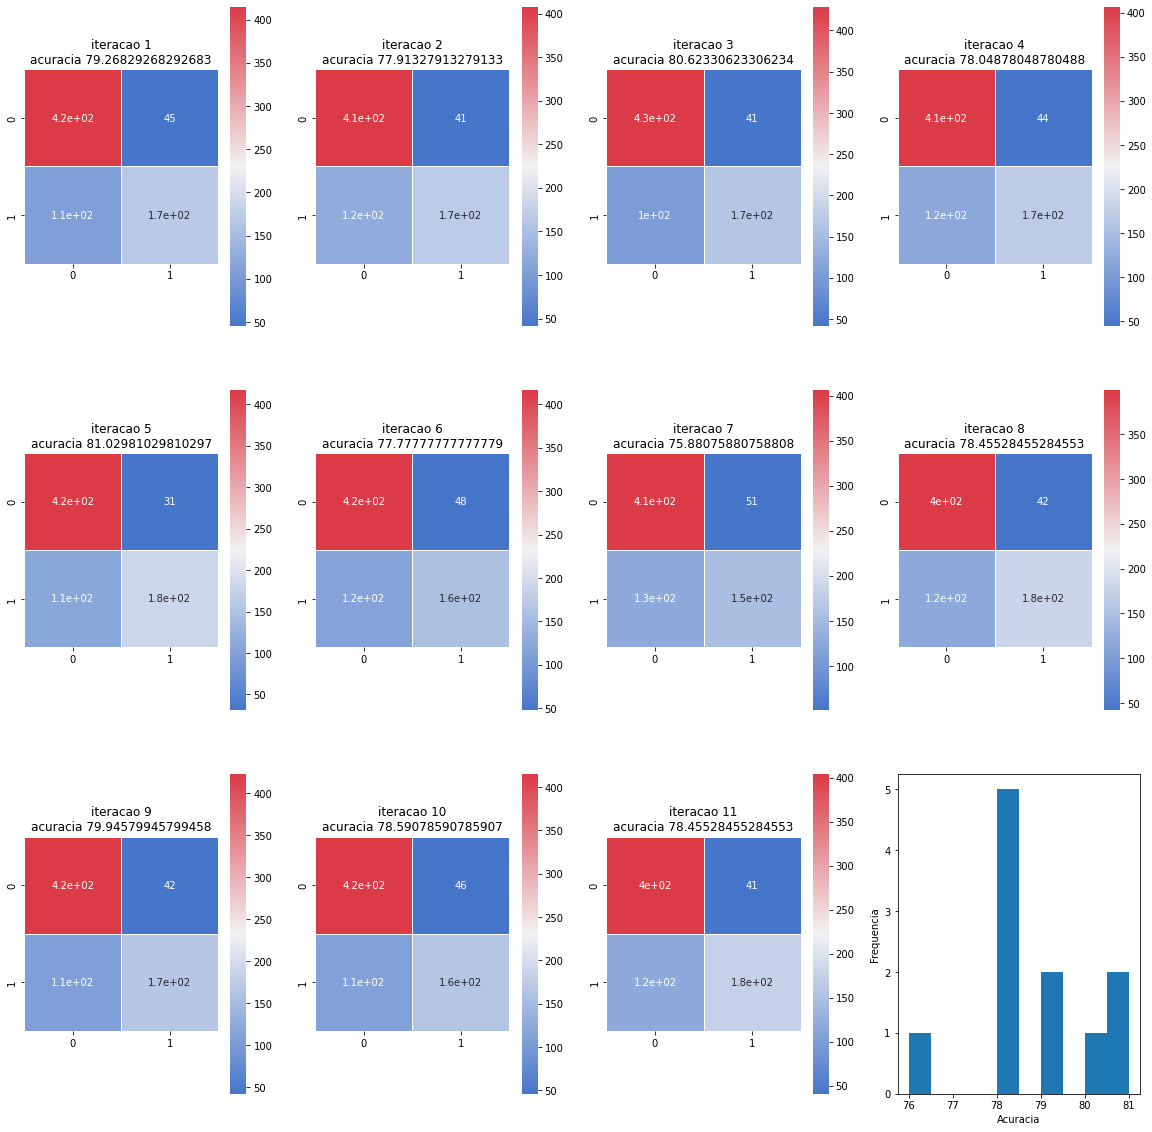

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   196  442  54  127           100.0      77.899878            100.0   
iteracao2   201  433  56  129           100.0      77.411477            100.0   
iteracao3   205  443  51  120           100.0      79.120879            100.0   
iteracao4   210  445  57  107           100.0      79.975580            100.0   
iteracao5   187  452  62  118           100.0      78.021978            100.0   
iteracao6   195  453  60  111           100.0      79.120879            100.0   
iteracao7   208  449  52  110           100.0      80.219780            100.0   
iteracao8   199  439  53  128           100.0      77.899878            100.0   
iteracao9   217  430  41  131           100.0      78.998779            100.0   
iteracao10  192  459  49  119           100.0      79.487179            100.0   
iteracao11  204  439  56  120           100.0      78.510379            100.0   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        78.400000  170  415  45  108           100.0      79.268293   
iteracao2        78.210117  167  408  41  122           100.0      77.913279   
iteracao3        80.078125  166  429  41  102           100.0      80.623306   
iteracao4        78.651685  169  407  44  118           100.0      78.048780   
iteracao5        75.100402  181  417  31  109           100.0      81.029810   
iteracao6        76.470588  158  416  48  116           100.0      77.777778   
iteracao7        80.000000  154  406  51  127           100.0      75.880759   
iteracao8        78.968254  180  399  42  117           100.0      78.455285   
iteracao9        84.108527  167  423  42  106           100.0      79.945799   
iteracao10       79.668050  165  415  46  112           100.0      78.590786   
iteracao11       78.461538  175  404  41  118           100.0      78.455285   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1             100.0       79.069767             0.0      -1.368415   
iteracao2             100.0       80.288462             0.0      -0.501802   
iteracao3             100.0       80.193237             0.0      -1.502427   
iteracao4             100.0       79.342723             0.0       1.926799   
iteracao5             100.0       85.377358             0.0      -3.007832   
iteracao6             100.0       76.699029             0.0       1.343101   
iteracao7             100.0       75.121951             0.0       4.339021   
iteracao8             100.0       81.081081             0.0      -0.555407   
iteracao9             100.0       79.904306             0.0      -0.947020   
iteracao10            100.0       78.199052             0.0       0.896394   
iteracao11            100.0       81.018519             0.0       0.055094   

                                             
           precision_treino precision_teste  
iteracao1               0.0       -0.669767  
iteracao2               0.0       -2.078345  
iteracao3               0.0       -0.115112  
iteracao4               0.0       -0.691038  
iteracao5               0.0      -10.276957  
iteracao6               0.0       -0.228441  
iteracao7               0.0        4.878049  
iteracao8               0.0       -2.112827  
iteracao9               0.0        4.204221  
iteracao10              0.0        1.468998  
iteracao11              0.0       -2.556980

In [369]:
metricas(lista_tts, lista_RF)

# XG_BOOST

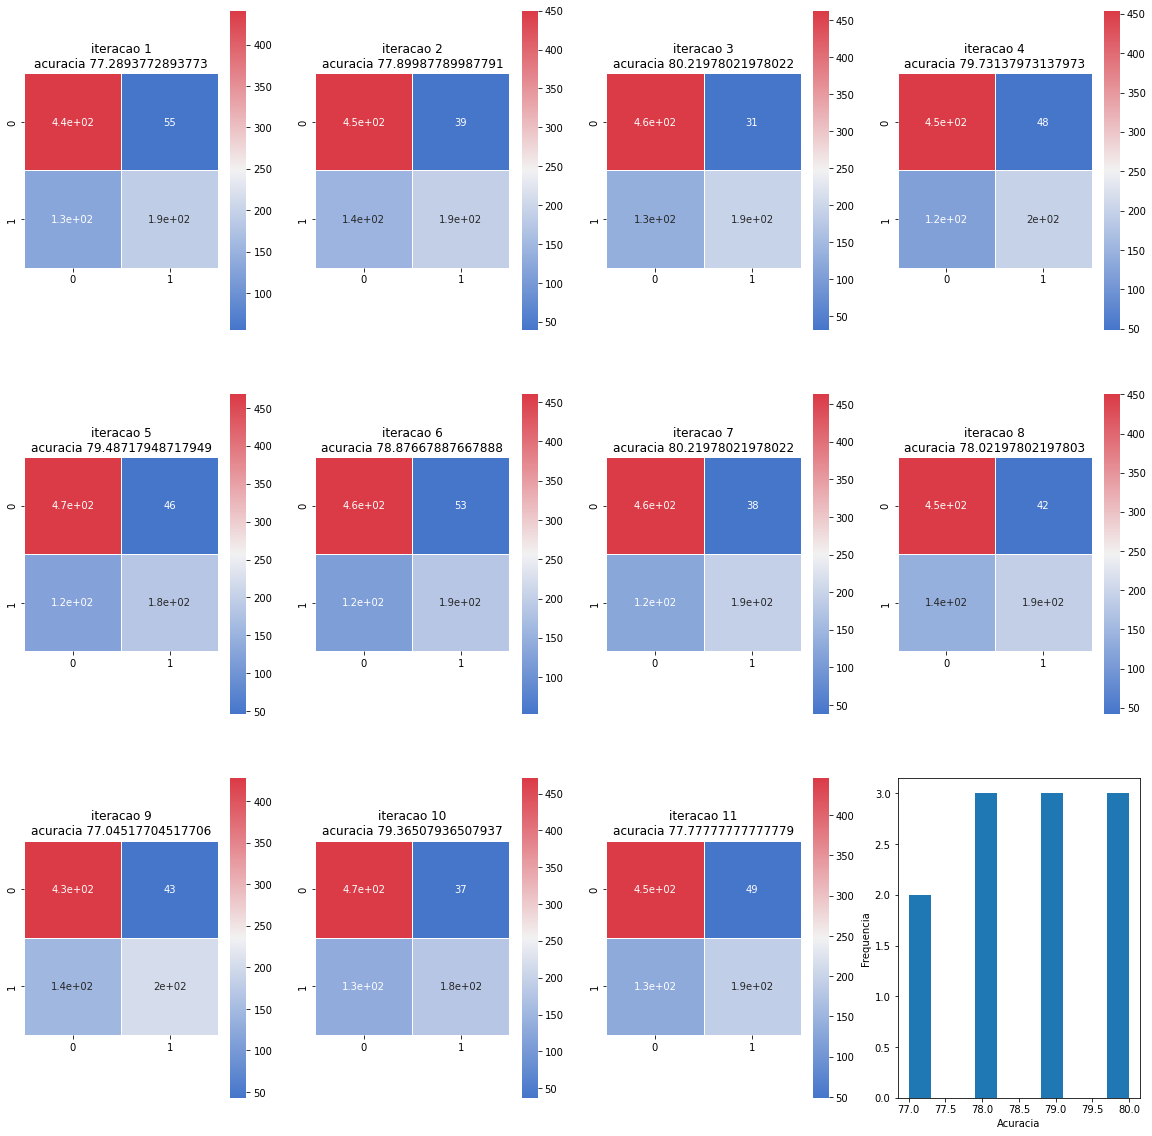

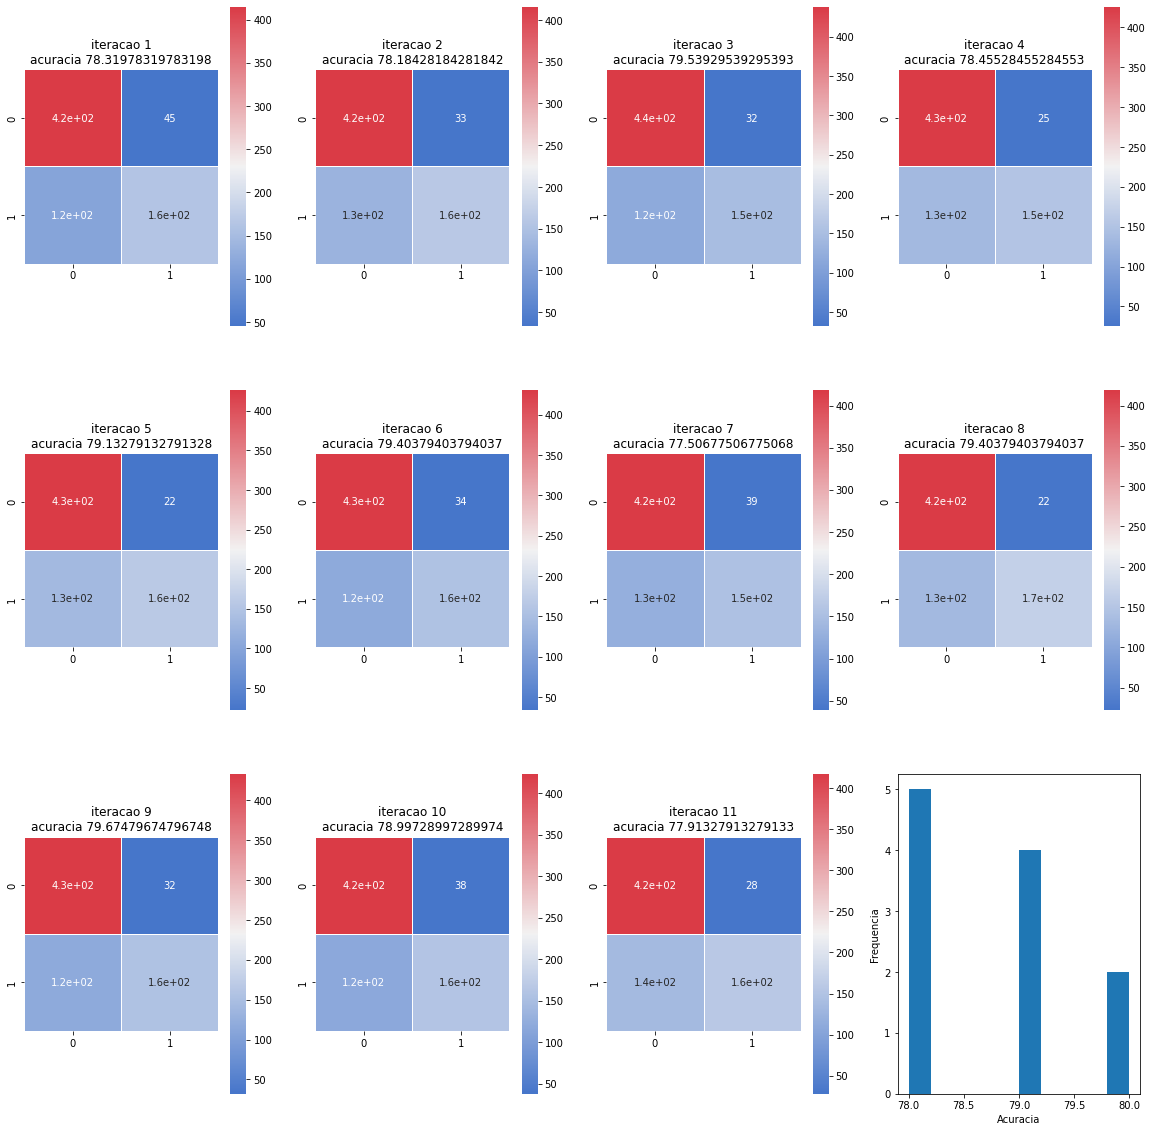

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   192  441  55  131       86.039886      77.289377        92.500000   
iteracao2   188  450  39  142       85.795686      77.899878        92.724679   
iteracao3   194  463  31  131       84.940985      80.219780        92.804699   
iteracao4   199  454  48  118       85.470085      79.731380        92.415730   
iteracao5   183  468  46  122       85.510786      79.487179        93.026499   
iteracao6   186  460  53  120       86.243386      78.876679        92.953930   
iteracao7   194  463  38  124       85.754986      80.219780        93.447293   
iteracao8   189  450  42  138       86.039886      78.021978        94.444444   
iteracao9   203  428  43  145       86.935287      77.045177        93.687231   
iteracao10  179  471  37  132       86.528287      79.365079        94.289694   
iteracao11  191  446  49  133       85.958486      77.777778        93.687231   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        77.732794  163  415  45  115       86.127429      78.319783   
iteracao2        82.819383  161  416  33  128       86.760054      78.184282   
iteracao3        86.222222  149  438  32  119       86.217804      79.539295   
iteracao4        80.566802  153  426  25  134       85.991866      78.455285   
iteracao5        79.912664  158  426  22  132       85.765929      79.132791   
iteracao6        77.824268  156  430  34  118       87.934930      79.403794   
iteracao7        83.620690  154  418  39  127       86.805242      77.506775   
iteracao8        81.818182  167  419  22  130       85.946679      79.403794   
iteracao9        82.520325  155  433  32  118       87.528242      79.674797   
iteracao10       82.870370  160  423  38  117       85.585178      78.997290   
iteracao11       79.583333  158  417  28  135       86.172616      77.913279   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1         94.281046       78.365385       -0.087543      -1.030406   
iteracao2         95.492487       82.989691       -0.964368      -0.284404   
iteracao3         94.533762       82.320442       -1.276819       0.680485   
iteracao4         95.532646       85.955056       -0.521781       1.276095   
iteracao5         94.691781       87.777778       -0.255143       0.354388   
iteracao6         95.638629       82.105263       -1.691544      -0.527115   
iteracao7         94.108280       79.792746       -1.050256       2.713005   
iteracao8         95.446585       88.359788        0.093207      -1.381816   
iteracao9         96.314103       82.887701       -0.592955      -2.629620   
iteracao10        93.884298       80.808081        0.943108       0.367789   
iteracao11        94.295302       84.946237       -0.214130      -0.135501   

                                             
           precision_treino precision_teste  
iteracao1         -1.781046       -0.632591  
iteracao2         -2.767808       -0.170307  
iteracao3         -1.729063        3.901780  
iteracao4         -3.116916       -5.388255  
iteracao5         -1.665282       -7.865114  
iteracao6         -2.684700       -4.280995  
iteracao7         -0.660987        3.827944  
iteracao8         -1.002140       -6.541607  
iteracao9         -2.626872       -0.367375  
iteracao10         0.405396        2.062290  
iteracao11        -0.608071       -5.362903

In [370]:
metricas(lista_tts, lista_XGB)

# Logistic Regression

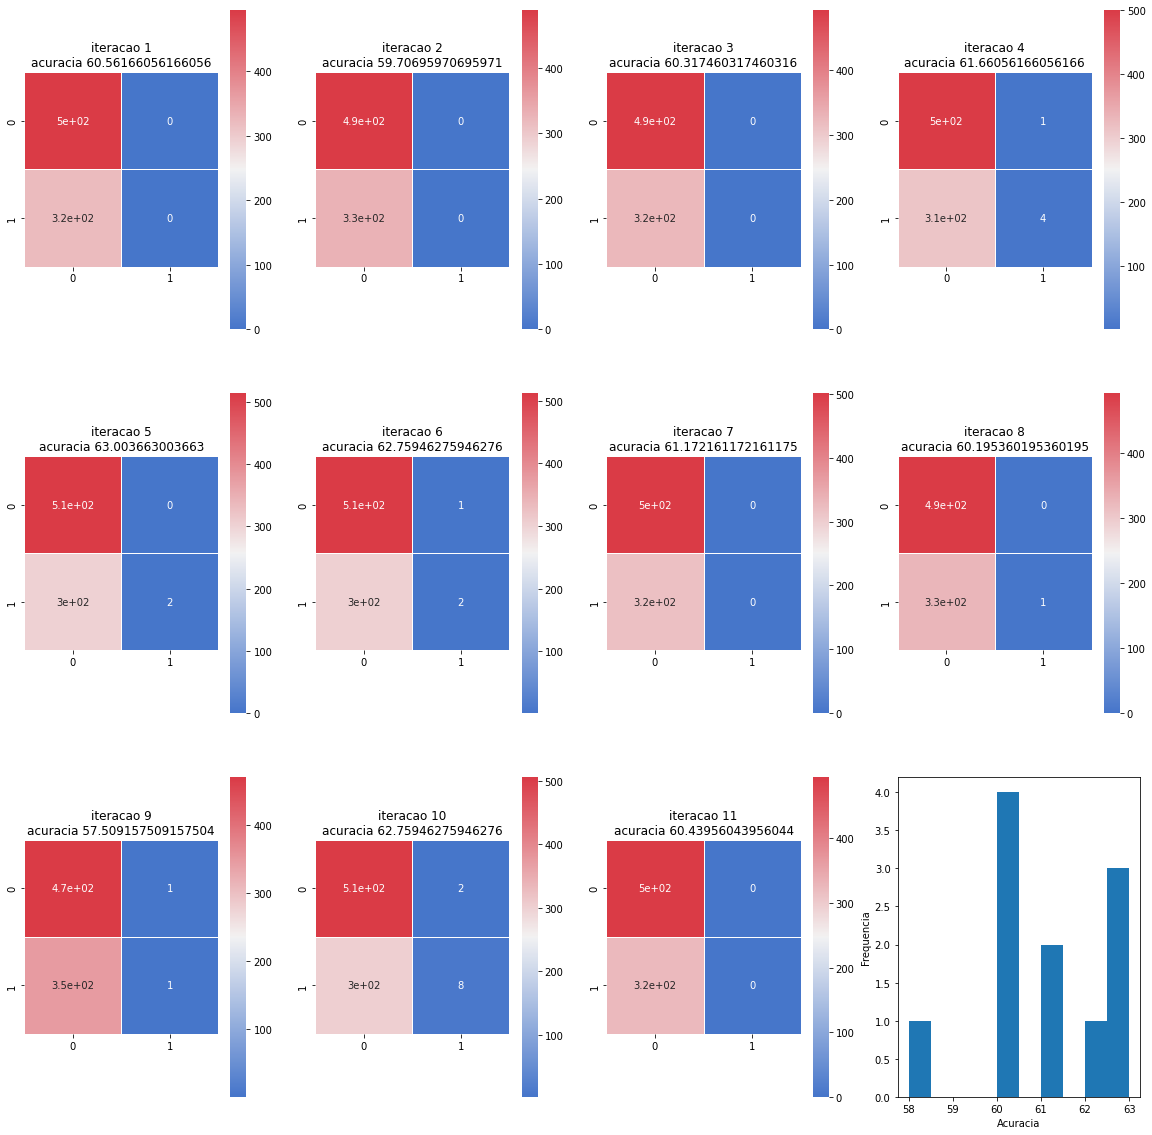

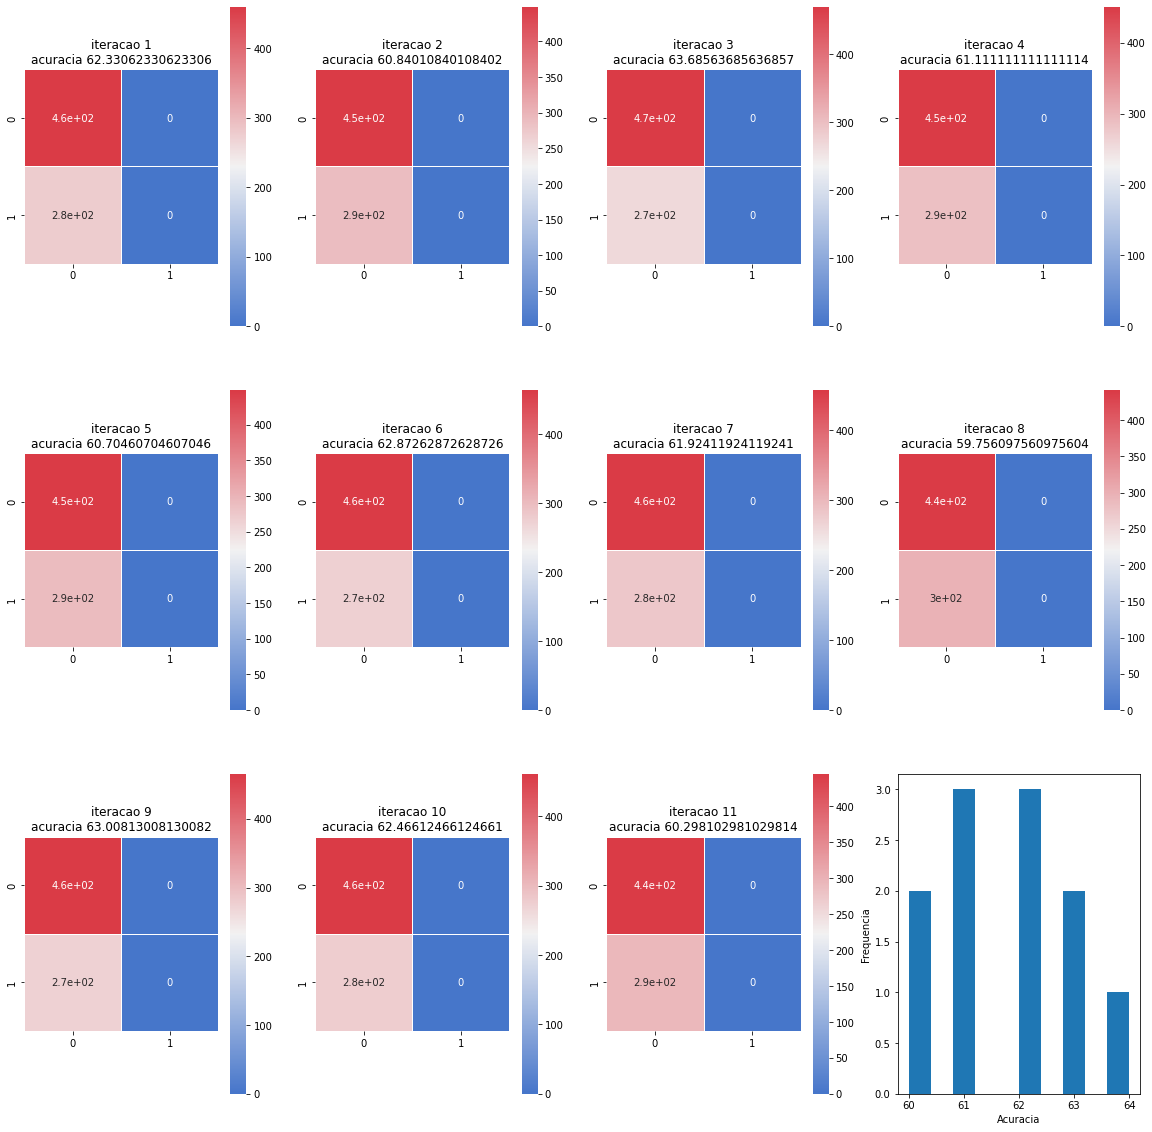

Cout                                                               \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1     0  496  0  323       61.131461      60.561661        50.000000   
iteracao2     0  489  0  330       61.416361      59.706960         0.000000   
iteracao3     0  494  0  325       61.253561      60.317460       100.000000   
iteracao4     4  501  1  313       61.172161      61.660562        81.818182   
iteracao5     2  514  0  303       60.561661      63.003663       100.000000   
iteracao6     2  512  1  304       60.724461      62.759463        81.818182   
iteracao7     0  501  0  318       61.009361      61.172161       100.000000   
iteracao8     1  492  0  326       61.538462      60.195360       100.000000   
iteracao9     1  470  1  347       62.596663      57.509158       100.000000   
iteracao10    8  506  2  303       61.212861      62.759463        71.875000   
iteracao11    0  495  0  324       61.131461      60.439560         0.000000   

                           Sout                                              \
           precision_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1         0.000000    0  460  0  278       61.635789      62.330623   
iteracao2         0.000000    0  449  0  289       62.132851      60.840108   
iteracao3         0.000000    0  470  0  268       61.183913      63.685637   
iteracao4        80.000000    0  451  0  287       62.042476      61.111111   
iteracao5       100.000000    0  448  0  290       62.178039      60.704607   
iteracao6        66.666667    0  464  0  274       61.455038      62.872629   
iteracao7         0.000000    0  457  0  281       61.997289      61.924119   
iteracao8       100.000000    0  441  0  297       62.494352      59.756098   
iteracao9        50.000000    0  465  0  273       61.409851      63.008130   
iteracao10       80.000000    0  461  0  277       61.590601      62.466125   
iteracao11        0.000000    0  445  0  293       62.313601      60.298103   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1               0.0             0.0       -0.504327      -1.768963   
iteracao2               0.0             0.0       -0.716490      -1.133149   
iteracao3               0.0             0.0        0.069648      -3.368177   
iteracao4               0.0             0.0       -0.870315       0.549451   
iteracao5               0.0             0.0       -1.616378       2.299056   
iteracao6               0.0             0.0       -0.730578      -0.113166   
iteracao7             100.0             0.0       -0.987928      -0.751958   
iteracao8               0.0             0.0       -0.955890       0.439263   
iteracao9               0.0             0.0        1.186812      -5.498973   
iteracao10              0.0             0.0       -0.377740       0.293338   
iteracao11              0.0             0.0       -1.182140       0.141457   

                                             
           precision_treino precision_teste  
iteracao1         50.000000        0.000000  
iteracao2          0.000000        0.000000  
iteracao3        100.000000        0.000000  
iteracao4         81.818182       80.000000  
iteracao5        100.000000      100.000000  
iteracao6         81.818182       66.666667  
iteracao7          0.000000        0.000000  
iteracao8        100.000000      100.000000  
iteracao9        100.000000       50.000000  
iteracao10        71.875000       80.000000  
iteracao11         0.000000        0.000000

In [371]:
metricas(lista_tts, lista_LR)

# Neural Network (Simulated only once)

# Com Outliers

In [320]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 1s 520us/step - loss: 0.6775 - accuracy: 0.6087
Epoch 2/50
2213/2213 [==============================] - 1s 521us/step - loss: 0.6578 - accuracy: 0.6227
Epoch 3/50
2213/2213 [==============================] - 1s 530us/step - loss: 0.6404 - accuracy: 0.6417
Epoch 4/50
2213/2213 [==============================] - 1s 528us/step - loss: 0.6330 - accuracy: 0.6566
Epoch 5/50
2213/2213 [==============================] - 1s 511us/step - loss: 0.6276 - accuracy: 0.6692
Epoch 6/50
2213/2213 [==============================] - 1s 532us/step - loss: 0.6251 - accuracy: 0.6706
Epoch 7/50
2213/2213 [==============================] - 1s 522us/step - loss: 0.6269 - accuracy: 0.6805
Epoch 8/50
2213/2213 [==============================] - 1s 531us/step - loss: 0.6272 - accuracy: 0.6846
Epoch 9/50
2213/2213 [==============================] - 1s 522us/step - loss: 0.6278 - accuracy: 0.6864
Epoch 10/50
2213/2213 [==============================] - 1s 505u

{'loss': 0.8547335863113403, 'accuracy': 0.6869918704032898}

# Sem Outliers

In [321]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 2s 540us/step - loss: 0.6782 - accuracy: 0.6001
Epoch 2/50
2213/2213 [==============================] - 1s 527us/step - loss: 0.6636 - accuracy: 0.6105
Epoch 3/50
2213/2213 [==============================] - 1s 549us/step - loss: 0.6563 - accuracy: 0.6146
Epoch 4/50
2213/2213 [==============================] - 1s 523us/step - loss: 0.6580 - accuracy: 0.6272
Epoch 5/50
2213/2213 [==============================] - 1s 521us/step - loss: 0.6563 - accuracy: 0.6281
Epoch 6/50
2213/2213 [==============================] - 1s 526us/step - loss: 0.6516 - accuracy: 0.6344
Epoch 7/50
2213/2213 [==============================] - 1s 533us/step - loss: 0.6410 - accuracy: 0.6606
Epoch 8/50
2213/2213 [==============================] - 1s 537us/step - loss: 0.6422 - accuracy: 0.6579
Epoch 9/50
2213/2213 [==============================] - 1s 551us/step - loss: 0.6351 - accuracy: 0.6733
Epoch 10/50
2213/2213 [==============================] - 1s 530u

{'loss': 0.8455836772918701, 'accuracy': 0.6056910753250122}

# Evitando Falsos Positivos

# Random Forest

In [322]:
def RF_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_predicted_proba = RF_clf.predict_proba(Train_X)
    RF_train_pred = (RF_train_predicted_proba [:,1] >= 0.8).astype('int')
    RF_test_predicted_proba = RF_clf.predict_proba(Test_X)
    RF_test_pred = (RF_test_predicted_proba [:,1] >= 0.8).astype('int')
    RF_train_score = accuracy_score(Train_Y, RF_train_pred)*100
    RF_train_Precisionscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_score = accuracy_score(Test_Y, RF_test_pred)*100
    RF_test_Precisionscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Precisionscore, RF_test_Precisionscore]]

# XG_BOOST

In [323]:
def XGB_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = RandomForestC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_predicted_proba = XGB_clf.predict_proba(Train_X)
    XGB_train_pred = (XGB_train_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_test_predicted_proba = XGB_clf.predict_proba(Test_X)
    XGB_test_pred = (XGB_test_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_train_score = accuracy_score(Train_Y, XGB_train_pred)*100
    XGB_train_Precisionscore = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_score = accuracy_score(Test_Y, XGB_test_pred)*100
    XGB_test_Precisionscore = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_Precisionscore, XGB_test_Precisionscore]]

# Rodando os classificadores

In [363]:
listaCout_tts_Fn = []; listaSout_tts_Fn = []; lista_tts_Fn = [[], []]; lista_RF_Fn = [[], []]; lista_XGB_Fn = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts_Fn[0].append(ttCout_split)
    lista_tts_Fn[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

# Random Fores

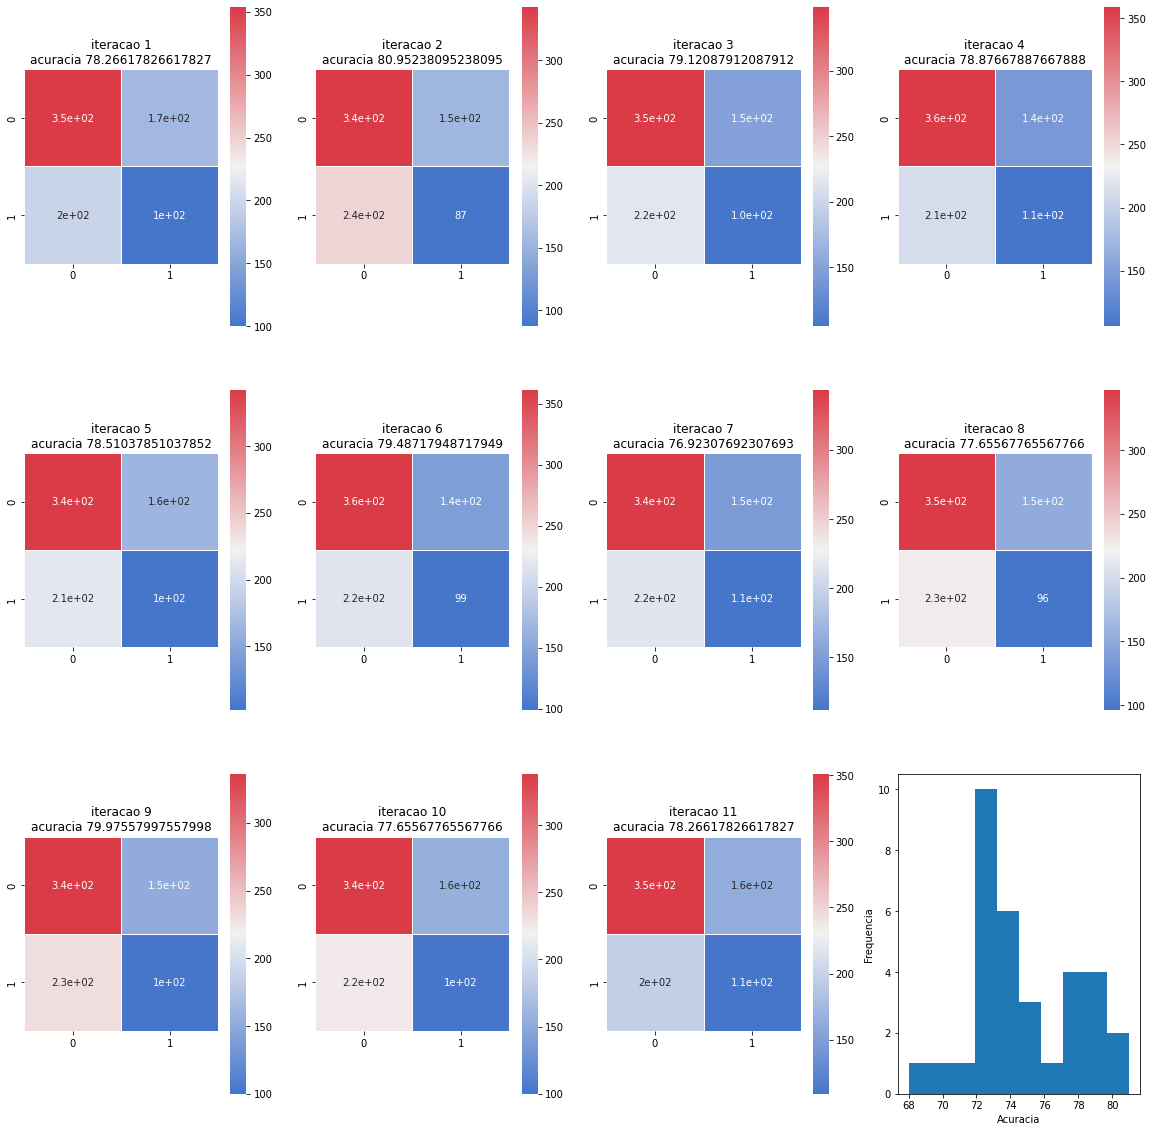

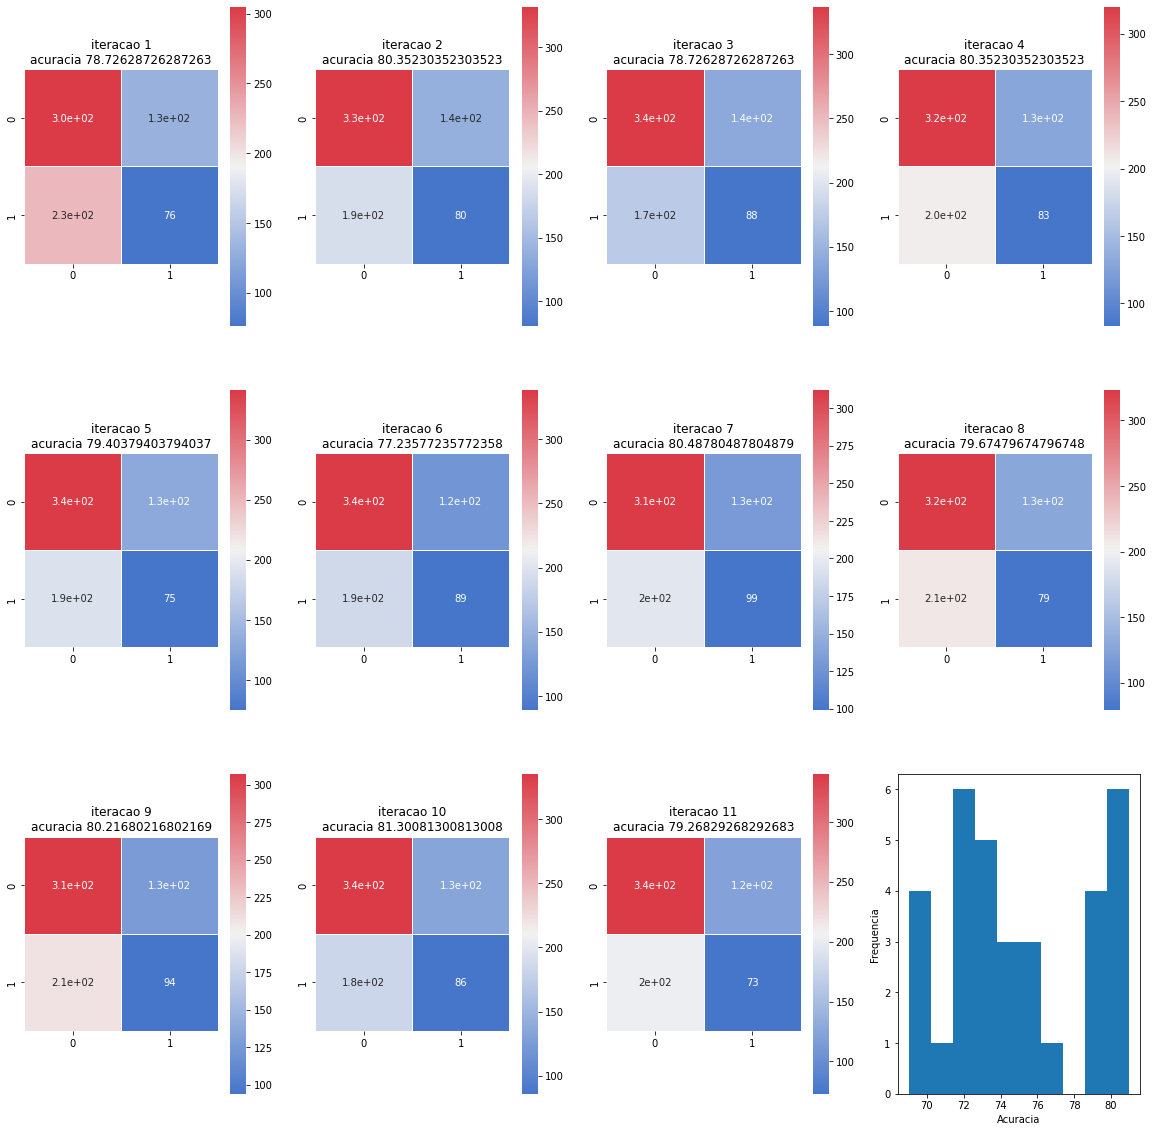

Cout                                                \
             Vp   Vn   Fp   Fn acuracia_treino acuracia_teste   
iteracao1   100  354  168  197           100.0      78.266178   
iteracao2    87  343  154  235           100.0      80.952381   
iteracao3   105  349  149  216           100.0      79.120879   
iteracao4   106  359  143  211           100.0      78.876679   
iteracao5   102  342  163  212           100.0      78.510379   
iteracao6    99  361  143  216           100.0      79.487179   
iteracao7   112  343  148  216           100.0      76.923077   
iteracao8    96  347  150  226           100.0      77.655678   
iteracao9   100  336  152  231           100.0      79.975580   
iteracao10  100  338  156  225           100.0      77.655678   
iteracao11  109  351  163  196           100.0      78.266178   

                                            Sout                 \
           precision_treino precision_teste   Vp   Vn   Fp   Fn   
iteracao1             100.0       77.238806   76  305  131  226   
iteracao2             100.0       80.912863   80  332  140  186   
iteracao3             100.0       80.708661   88  337  140  173   
iteracao4             100.0       78.714859   83  320  130  205   
iteracao5             100.0       80.377358   75  341  131  191   
iteracao6             100.0       78.099174   89  338  122  189   
iteracao7             100.0       78.076923   99  312  131  196   
iteracao8             100.0       77.642276   79  323  128  208   
iteracao9             100.0       82.142857   94  307  127  210   
iteracao10            100.0       79.687500   86  335  134  183   
iteracao11            100.0       77.573529   73  340  122  203   

                                                                            \
           acuracia_treino acuracia_teste precision_treino precision_teste   
iteracao1            100.0      78.726287            100.0       80.193237   
iteracao2            100.0      80.352304            100.0       78.181818   
iteracao3            100.0      78.726287            100.0       76.754386   
iteracao4            100.0      80.352304            100.0       78.403756   
iteracao5            100.0      79.403794            100.0       81.553398   
iteracao6            100.0      77.235772            100.0       77.251185   
iteracao7            100.0      80.487805            100.0       80.869565   
iteracao8            100.0      79.674797            100.0       83.574879   
iteracao9            100.0      80.216802            100.0       81.447964   
iteracao10           100.0      81.300813            100.0       77.272727   
iteracao11           100.0      79.268293            100.0       77.948718   

                 Cout-Sout                                                  
           acuracia_treino acuracia_teste precision_treino precision_teste  
iteracao1              0.0      -0.460109              0.0       -2.954431  
iteracao2              0.0       0.600077              0.0        2.731045  
iteracao3              0.0       0.394592              0.0        3.954275  
iteracao4              0.0      -1.475625              0.0        0.311104  
iteracao5              0.0      -0.893416              0.0       -1.176040  
iteracao6              0.0       2.251407              0.0        0.847989  
iteracao7              0.0      -3.564728              0.0       -2.792642  
iteracao8              0.0      -2.019119              0.0       -5.932603  
iteracao9              0.0      -0.241222              0.0        0.694893  
iteracao10             0.0      -3.645135              0.0        2.414773  
iteracao11             0.0      -1.002114              0.0       -0.375189

In [365]:
metricas(lista_tts_Fn, lista_RF)

# XG_BOOST

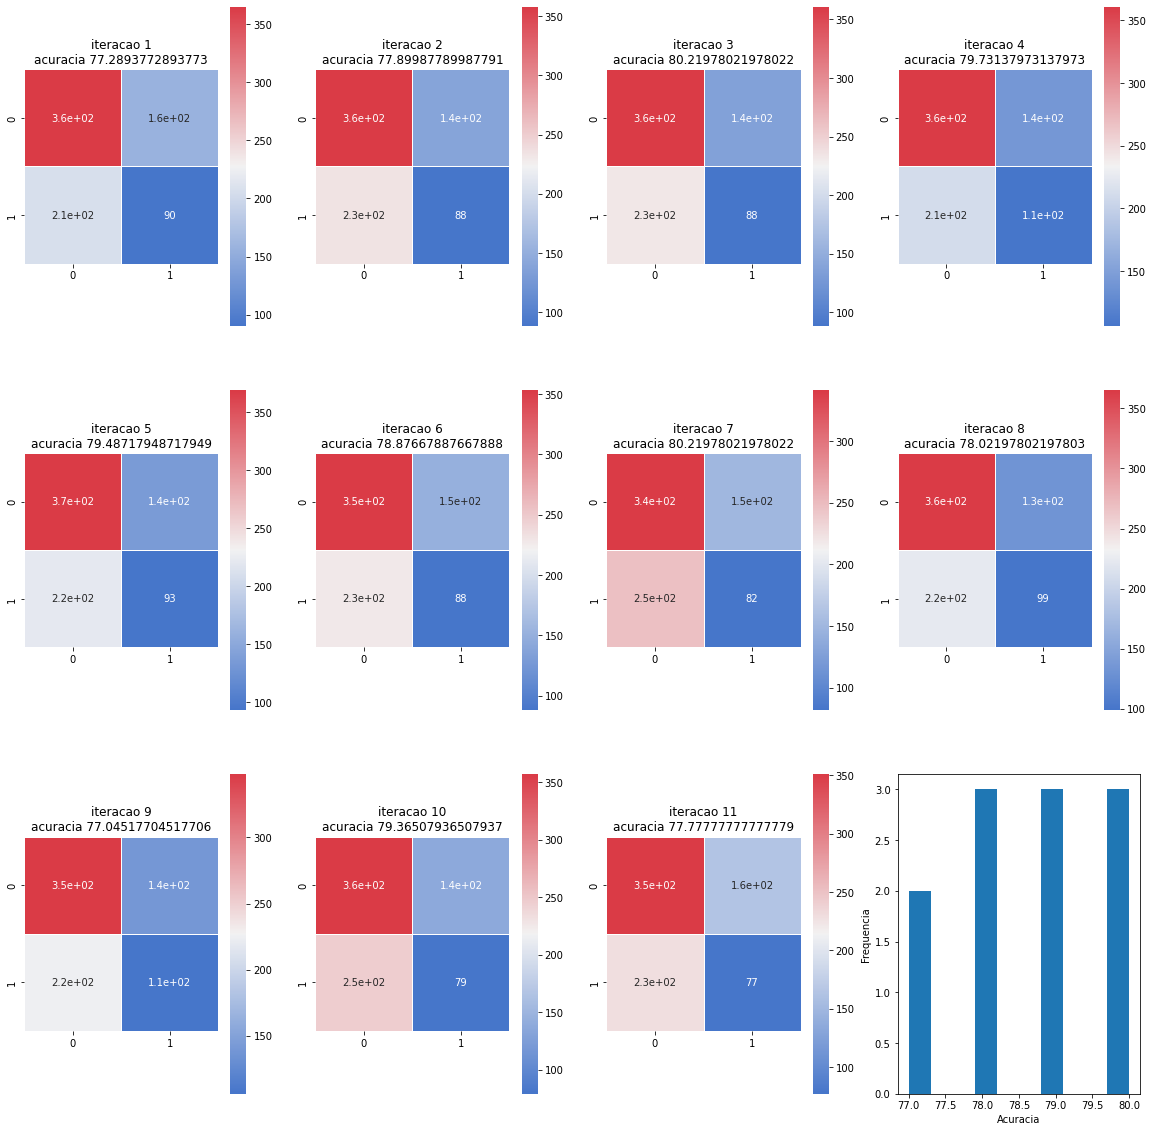

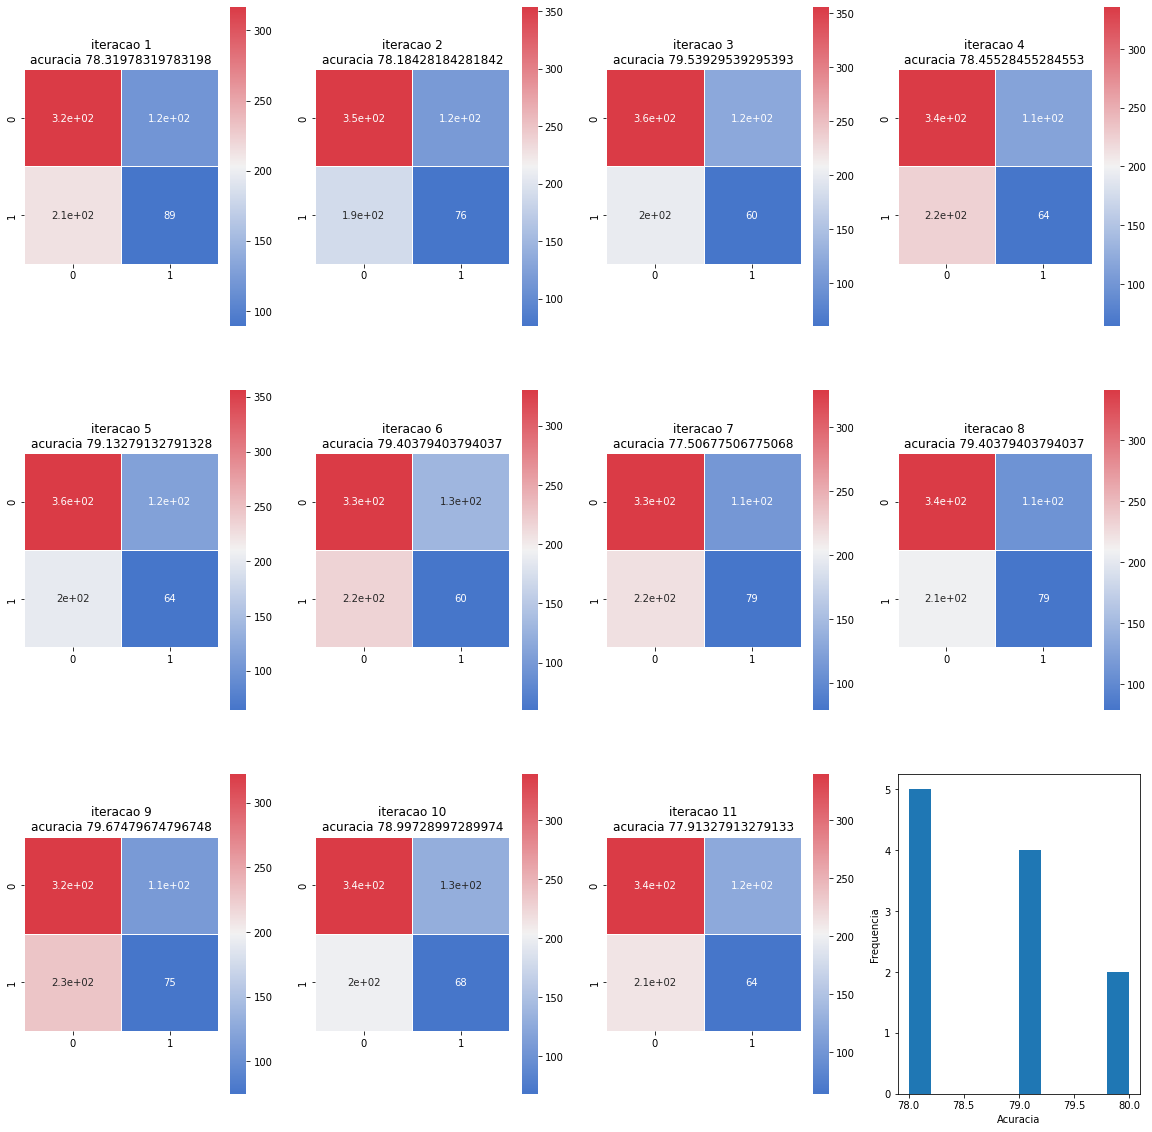

Cout                                                \
             Vp   Vn   Fp   Fn acuracia_treino acuracia_teste   
iteracao1    90  365  157  207       86.039886      77.289377   
iteracao2    88  358  139  234       85.795686      77.899878   
iteracao3    88  361  137  233       84.940985      80.219780   
iteracao4   106  361  141  211       85.470085      79.731380   
iteracao5    93  369  136  221       85.510786      79.487179   
iteracao6    88  353  151  227       86.243386      78.876679   
iteracao7    82  341  150  246       85.754986      80.219780   
iteracao8    99  365  132  223       86.039886      78.021978   
iteracao9   106  348  140  225       86.935287      77.045177   
iteracao10   79  357  137  246       86.528287      79.365079   
iteracao11   77  351  163  228       85.958486      77.777778   

                                            Sout                 \
           precision_treino precision_teste   Vp   Vn   Fp   Fn   
iteracao1         92.500000       77.732794   89  317  119  213   
iteracao2         92.724679       82.819383   76  354  118  190   
iteracao3         92.804699       86.222222   60  356  121  201   
iteracao4         92.415730       80.566802   64  336  114  224   
iteracao5         93.026499       79.912664   64  356  116  202   
iteracao6         92.953930       77.824268   60  330  130  218   
iteracao7         93.447293       83.620690   79  329  114  216   
iteracao8         94.444444       81.818182   79  341  110  208   
iteracao9         93.687231       82.520325   75  322  112  229   
iteracao10        94.289694       82.870370   68  339  130  201   
iteracao11        93.687231       79.583333   64  340  122  212   

                                                                            \
           acuracia_treino acuracia_teste precision_treino precision_teste   
iteracao1        86.127429      78.319783        94.281046       78.365385   
iteracao2        86.760054      78.184282        95.492487       82.989691   
iteracao3        86.217804      79.539295        94.533762       82.320442   
iteracao4        85.991866      78.455285        95.532646       85.955056   
iteracao5        85.765929      79.132791        94.691781       87.777778   
iteracao6        87.934930      79.403794        95.638629       82.105263   
iteracao7        86.805242      77.506775        94.108280       79.792746   
iteracao8        85.946679      79.403794        95.446585       88.359788   
iteracao9        87.528242      79.674797        96.314103       82.887701   
iteracao10       85.585178      78.997290        93.884298       80.808081   
iteracao11       86.172616      77.913279        94.295302       84.946237   

                 Cout-Sout                                                  
           acuracia_treino acuracia_teste precision_treino precision_teste  
iteracao1        -0.087543      -1.030406        -1.781046       -0.632591  
iteracao2        -0.964368      -0.284404        -2.767808       -0.170307  
iteracao3        -1.276819       0.680485        -1.729063        3.901780  
iteracao4        -0.521781       1.276095        -3.116916       -5.388255  
iteracao5        -0.255143       0.354388        -1.665282       -7.865114  
iteracao6        -1.691544      -0.527115        -2.684700       -4.280995  
iteracao7        -1.050256       2.713005        -0.660987        3.827944  
iteracao8         0.093207      -1.381816        -1.002140       -6.541607  
iteracao9        -0.592955      -2.629620        -2.626872       -0.367375  
iteracao10        0.943108       0.367789         0.405396        2.062290  
iteracao11       -0.214130      -0.135501        -0.608071       -5.362903

In [372]:
metricas(lista_tts_Fn, lista_XGB)